In [1]:
import os, sys
import random
import numpy as np
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

(256, 256, 3)
(256, 256, 3)


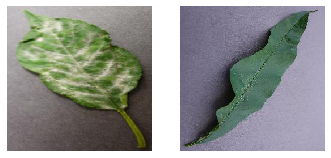

In [2]:
imfile_pattern = 'data/color/*/*.JPG'

imfile_list = glob(imfile_pattern)
random.shuffle(imfile_list)

plt.rcParams['figure.figsize'] = (15.0, 15.0)
img_list = []
for idx, file in enumerate(imfile_list[:2]):
    img = mpimg.imread(file)
    print(img.shape)
    plt.subplot(4,5,idx+1)
    imgplot = plt.imshow(img)
    plt.axis('off')

    img_list.append(img)
plt.show()

In [3]:
def load_leafdata(imfile_list, num_samples=2000, seed=123):
    X = []
    y = []
    random.seed(seed)
    random.shuffle(imfile_list)
    for imfile in imfile_list[:num_samples]:
        X.append(mpimg.imread(imfile))
        y.append(imfile)
    
    return np.array(X), np.array(y)

In [4]:
X, y = load_leafdata(imfile_list, 2000)

In [5]:
X.shape, y.shape

((2000, 256, 256, 3), (2000,))

In [6]:
labels = np.array([0 if 'healthy' in name else 1 for name in y])

In [7]:
X_train, y_train = X[:1800], labels[:1800]
X_val, y_val = X[1800:1900], labels[1800:1900]
X_test, y_test = X[1900:], labels[1900:]

In [8]:
# normalize
X_train = X_train/255
X_test = X_test/255

In [9]:
# convert to one hot
y_train = np.eye(2)[y_train]
y_test = np.eye(2)[y_test]

In [10]:
X_val = X_val/255

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800, 256, 256, 3), (1800, 2), (100, 256, 256, 3), (100, 2))

In [12]:
(imw, imh, c) = X.shape[1:]
num_classes = 2

In [13]:
#import tensorflow as tf
base_model= tf.keras.applications.ResNet50(weights='imagenet', \
                                           include_top=None, input_shape=X.shape[1:])


#applications.resnet50.ResNet50(\
#            weights='imagenet', include_top=None,
#            input_shape=X.shape[1:])

In [15]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [18]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=1e-3)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [20]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs = 3, batch_size = 32, verbose=1)

Train on 1800 samples
Epoch 1/3
1800/1800 [==============================] - 520s 289ms/sample - loss: 0.3084 - accuracy: 0.8844
Epoch 2/3
1800/1800 [==============================] - 494s 274ms/sample - loss: 0.2150 - accuracy: 0.9111
Epoch 3/3
1800/1800 [==============================] - 485s 270ms/sample - loss: 0.1345 - accuracy: 0.9483


In [22]:
model.evaluate(X_test, y_test)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.994657711982727, 0.72]

In [ ]:
model

In [ ]:
model.history